# K-Means Clustering

### What is it?

K-Means clustering in its simplest terms is used to categorise data that otherwise is ungrouped. It is particularly useful because it helps to identify groups in the data that the user could potentially be unaware of, as well as helping to confirm any assumptions that they may already have about the unlabeled data. It is classed as a 'unsupervised algorithm' and is used in machine learning to allow the machine to group and label the data itself.

### How it works

- In K-Means clustering $K$ is used to represent how many clusters or 'groups' to identify in the data from a set of points $x_1$...$x_n$.

- Centroids $C_k$ centroids are then placed randomly within the space     $x_1$...$x_n$

- For each point $x_i$ find the nearest centroid $c_j$ and then assign $x_i$ to the nearest cluster $c_j$

- Then for each cluster $C_j$ reposition it based on the mean of all the points $x_i$ vectors assigned to that cluster. 

- Repeat the above two steps until no points have changed centroid


### K-Means Clustering

In this example I will be using a dataset of different wines from Italy. In the dataset they are each assigned one of three Types. I will remove this column from the dataframe and will use K-Means clustering to assign these three types and then compare to the original

Dataset can be found [here](http://archive.ics.uci.edu/ml/datasets/Wine)

In [11]:
#import all necessart libraries
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [12]:
headers = ['Type','Alcohol', 'Malic','Ash' ,'Alcalinity','Magnesium','Phenols', 'Flavanoids', 
           'Nonflavanoids', 'Proanthocyanins', 'Color '
           ,'Hue', 'Dilution', 'Proline']
wines = pd.read_csv(r'./data/wine.csv',header=None)

wines.columns = headers

In [13]:
wines.groupby('Type').count()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,,,,,,,,,,,,,
1,59,59,59,59,59,59,59,59,59,59,59,59,59
2,71,71,71,71,71,71,71,71,71,71,71,71,71
3,48,48,48,48,48,48,48,48,48,48,48,48,48


From the above we can see that there are 59,71 and 48 of each type respectively.

In [14]:
Types = wines.loc[:,:'Type']
#remove types from dataset
df = wines.loc[:,'Alcohol':'Proline']

#Normalise data
from sklearn.preprocessing import scale
df = scale(df)

#### Determining K

Although we already know that the wine dataset has three types assigned it would be useful to have a method to help determine the best value of K when we don't know. In this example we will use the elbow method to help determine the optimal value for K

[3.5179946124432151, 2.9298930387654556, 2.5325371489267074, 2.4483794044623157, 2.3816359730580881, 2.3181051595526063, 2.2677825770690903, 2.2036837214420069, 2.1485020416886993]


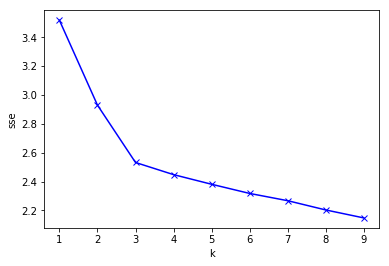

In [15]:
sse = []
k_range = range(1,10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    sse.append(sum(np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
    
print(sse)
plt.plot(k_range,sse,'bx-')
plt.xlabel('k')
plt.ylabel('sse')
plt.show()

The above elbow point can be considered to be 3 as this is where the angle of the graph changes the most, i.e the point at which the drop in standard error can be considered to be marginal after that point. So for example, the drop in sse between 2 and 3 is much larger than 3 and 4 onwards. It is worth noting that the elbow method becomes less accurate the more sporadic and less clustered the data.

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


As you can see from the above the k means clustering has not assigned types in the same way as the original dataset i.e 1 could be assigned a value of 2. As a result of this it makes scoring the predictions a little more tricky

### Scoring our clusters

Sklearn luckily provides us with a function to compare the similarity of two arrays for similarity between them whilst ignoring the permutations

In [17]:
metrics.adjusted_rand_score(wines['Type'].values,labels)

0.9148795960669529

Above we can see that the k means clustering has grouped the results with over 90% accuracy 

### Useful resources

Below are some online resources I found particularly useful for understanding k means clustering

[K-Means clusternig example with Python and Scikit-learn](K-Means clusternig example with Python and Scikit-learn)

[K-Means clustering example scikit-learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

[K-means clustering: how it works youtube video by Victor Lavrenko](https://www.youtube.com/watch?v=_aWzGGNrcic)

